# Import Library and about data

In [1]:
# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.graph_objects as go
from nltk.corpus import stopwords

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
# Data Import
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv" , sep = "," , encoding = "utf-8")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# showing all columns with datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
# View summary statistics for columns with numeric data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


# **Data Pre-processing and Cleaning**

In [5]:
# Searching about duplicated values
df.duplicated().sum()

0

In [6]:
# Finding missing values
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
#filling missing values with interpolate method
# limit is Maximum number of consecutive NaNs to fill. Must be greater than 0.
df.fillna(method='ffill', limit=5, inplace=True)
df.fillna(method='bfill', limit=5, inplace=True)
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402757
End_Lng                  3402757
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp           4024
Temperature(F)              4035
Wind_Chill(F)            1417136
Humidity(%)                 4068
Pressure(in)                4033
Visibility(mi)              4032
Wind_Direction              4040
Wind_Speed(mph)            11197
Precipitation(in)        1368847
Weather_Condition           4024
Amenity                        0
Bump      

In [8]:
# Drop columns having high missing values
df.dropna(thresh=40)
df.drop(columns=['End_Lat', 'End_Lng'],inplace= True)
df.dropna(subset=['Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)'],inplace = True)
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             9
Visibility(mi)           7
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [9]:
df.nunique()

ID                       5940949
Source                         3
Severity                       4
Start_Time               4473167
End_Time                 5052262
Start_Lat                2067448
Start_Lng                2125418
Distance(mi)               21826
Description              2956674
Street                    299690
City                       13183
County                      1839
State                         49
Zipcode                   689689
Country                        1
Timezone                       4
Airport_Code                2032
Weather_Timestamp         738561
Temperature(F)               786
Wind_Chill(F)                950
Humidity(%)                  100
Pressure(in)                1134
Visibility(mi)                82
Wind_Direction                24
Wind_Speed(mph)              156
Precipitation(in)            280
Weather_Condition            142
Amenity                        2
Bump                           2
Crossing                       2
Give_Way  

In [10]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Heavy Rain',
       'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Light Freezing Fog',
       'Light Haze', 'Mist', 'Light Rain Showers', 'Shallow Fog', 'Fair',
       'Smoke', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Volcanic Ash',
       'Light Thunderstorms and Rain', 'Showers in the Vicinity',
       'Thunderstorm', 'Light Rain Shower', 'Light Rain with Thunder',
       'Thunderstorms and Rain', 'Partly Cloudy / Windy',
       'Thunder in the Vicinity', 'T-Storm', 'Patches of Fog', 'Thunder',
       'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud',
       'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Heavy Snow', 'Light

In [41]:
weather_bins = {
    'Clear': ['Clear', 'Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rainy': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snowy': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Windy': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy'],
    'Hail': ['Hail'],
    'Volcanic Ash': ['Volcanic Ash'],
    'Tornado': ['Tornado']
}

def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other' 
df1=df.copy()
df1['Weather_Bin'] = df['Weather_Condition'].apply(map_weather_to_bins)
df1['Weather_Bin']
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Bin
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,Night,Night,Night,Night,Rainy
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,Night,Night,Night,Day,Rainy
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,True,False,Night,Night,Day,Day,Other
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,Night,Day,Day,Day,Cloudy
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,True,False,Day,Day,Day,Day,Cloudy


In [42]:
df1.drop(columns=['Weather_Condition'], inplace=True)

In [43]:
df1['Pressure_Category'] = pd.cut(df1['Pressure(in)'], bins=[0, 29.5, 30.2, 100], labels=['Low', 'Normal', 'High'])
df1['Visibility_Category'] = pd.cut(df1['Visibility(mi)'], bins=[0, 1, 5, 100], labels=['Poor', 'Moderate', 'Clear'])

In [44]:
df1.drop(columns=['Pressure(in)','Visibility(mi)'], inplace = True)
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Bin,Pressure_Category,Visibility_Category
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,Night,Night,Night,Night,Rainy,Normal,Clear
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,Night,Night,Night,Day,Rainy,Normal,Clear
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,True,False,Night,Night,Day,Day,Other,Normal,Clear
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,Night,Day,Day,Day,Cloudy,Normal,Clear
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,True,False,Day,Day,Day,Day,Cloudy,Normal,Clear


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940949 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Source                 object  
 2   Severity               int64   
 3   Start_Time             object  
 4   End_Time               object  
 5   Start_Lat              float64 
 6   Start_Lng              float64 
 7   Distance(mi)           float64 
 8   Description            object  
 9   Street                 object  
 10  City                   object  
 11  County                 object  
 12  State                  object  
 13  Zipcode                object  
 14  Country                object  
 15  Timezone               object  
 16  Airport_Code           object  
 17  Weather_Timestamp      object  
 18  Temperature(F)         float64 
 19  Wind_Chill(F)          float64 
 20  Humidity(%)            float64 
 21  Wind_Direction         object  
 22 

# Location Based Analysis of Accidents

**Number of Accidents for each State**

In [16]:
#The number of accidents for each U.S. state.
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

**Top 15 States with Highest Number of Accidents**

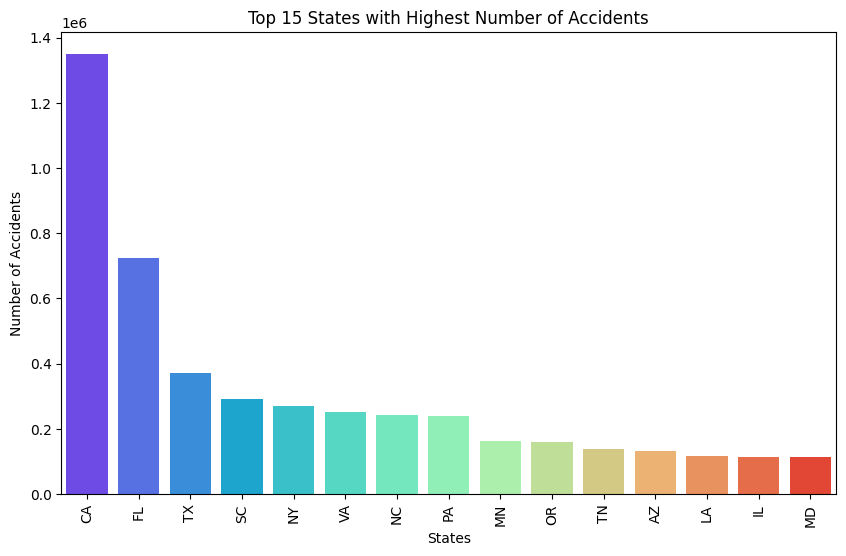

In [17]:
## Observing top 15 states have most accidents
fig,axs = plt.subplots(figsize = (10,6))

state_acc_counts = pd.DataFrame(df['State'].value_counts())

x = state_acc_counts[0:15].index.to_list()
y = state_acc_counts[0:15].values.flatten()

sns.barplot(x=x, y = y, palette='rainbow')
axs.tick_params(axis = 'x', rotation = 90)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("Top 15 States with Highest Number of Accidents")
plt.savefig("Top_15_States_Accidents.png",bbox_inches = 'tight', dpi = 300)
plt.show()

**Top 50 Cities with Highest No. of Accidents**

City Code:  ['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Clarksdale' 'Bridgeboro'
 'American Fork-Pleasant Grove']
Total No. of Cities in Dataset:  13183


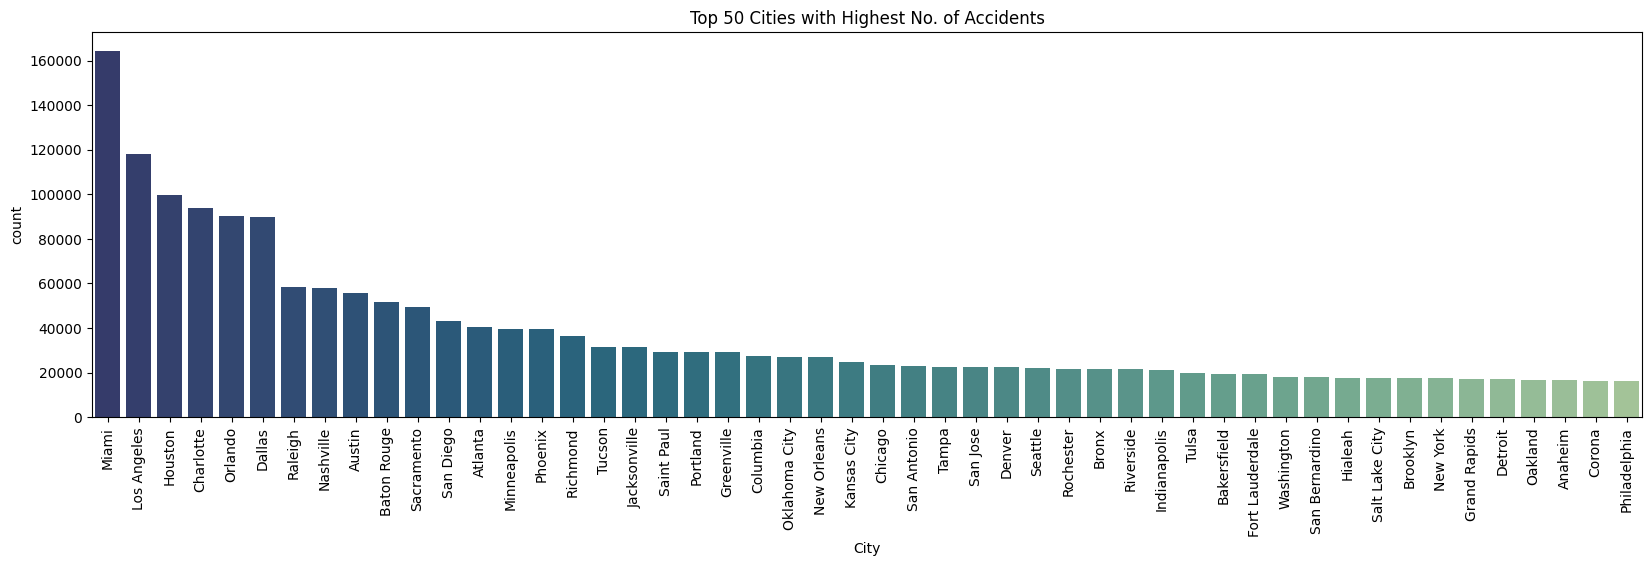

In [18]:
print("City Code: ", df.City.unique())
print("Total No. of Cities in Dataset: ", len(df.City.unique()))

fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

# Weather Stimuli Impact on Accidents

In [19]:
#Display related columns
weather = df.iloc[:, 18:27]
weather['Severity'] = df['Severity']
weather.head()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Severity
0,36.9,33.3,91.0,29.68,10.0,Calm,3.5,0.02,Light Rain,3
1,37.9,33.3,100.0,29.65,10.0,Calm,3.5,0.00,Light Rain,2
2,36.0,33.3,100.0,29.67,10.0,SW,3.5,0.00,Overcast,2
3,35.1,31.0,96.0,29.64,9.0,SW,4.6,0.00,Mostly Cloudy,3
4,36.0,33.3,89.0,29.65,6.0,SW,3.5,0.00,Mostly Cloudy,2


**Outlier Cleaning**

<Axes: >

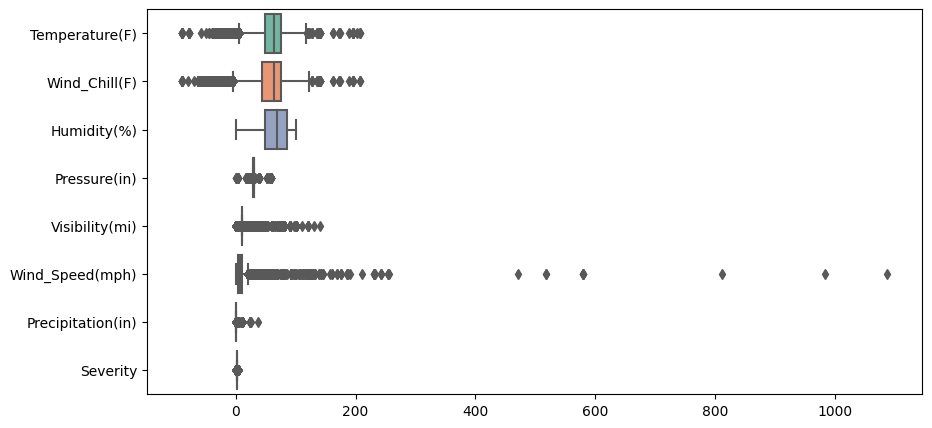

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=weather, orient="h", palette="Set2")

In [21]:
def remove_outliers(df,name='feature'):
    # IQR
    # Calculate the upper and lower limits
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1

    # Removing the outliers
    df = df[~((df[name] < (Q1 - 1.5 * IQR)) |(df[name] > (Q3 + 1.5 * IQR)))]
 
    return df

In [22]:
weather = remove_outliers(weather,name='Temperature(F)')
weather = remove_outliers(weather,name='Wind_Chill(F)')
weather = remove_outliers(weather,name='Humidity(%)')
weather = remove_outliers(weather,name='Pressure(in)')
weather = remove_outliers(weather,name='Wind_Speed(mph)')

<Axes: >

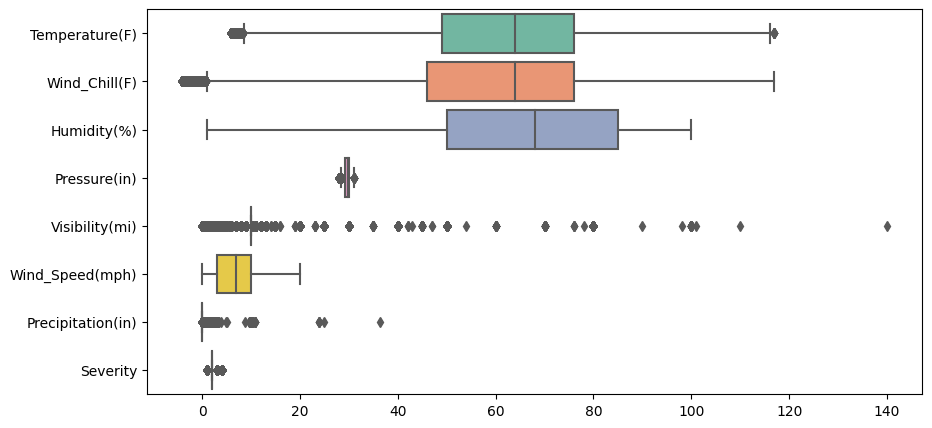

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=weather, orient="h", palette="Set2")

**Temperature(F)**

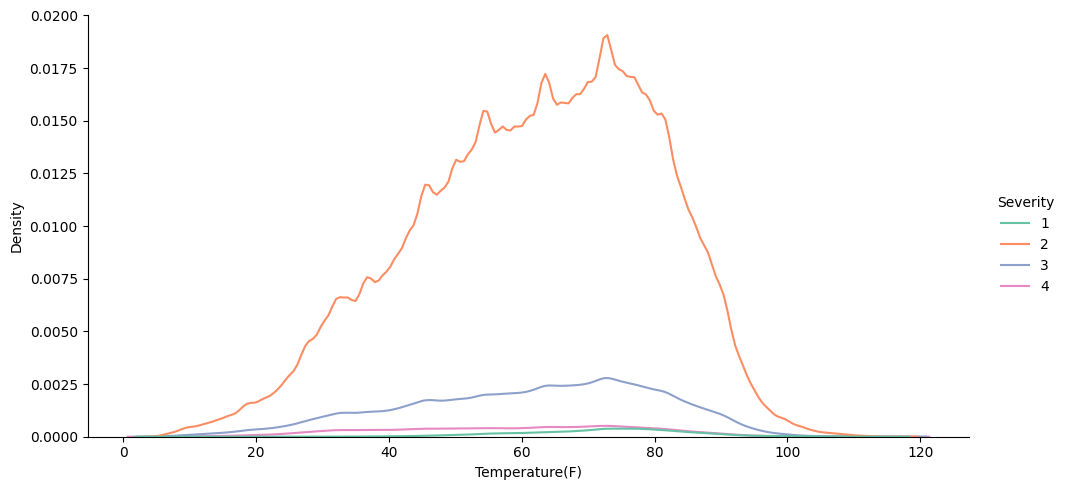

In [24]:
sns.displot(weather, x="Temperature(F)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

**Wind Chill(F)**

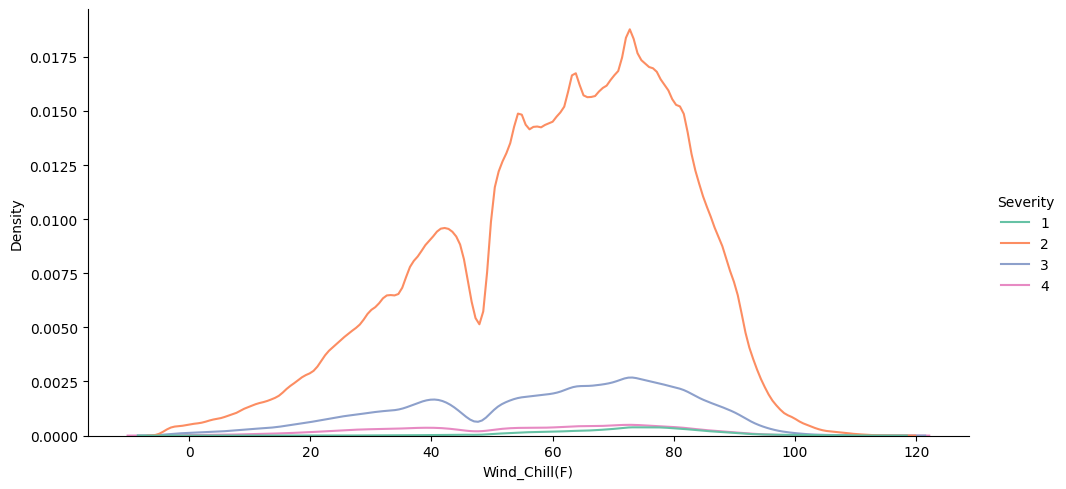

In [25]:
sns.displot(weather, x="Wind_Chill(F)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

**Humidity(%)**

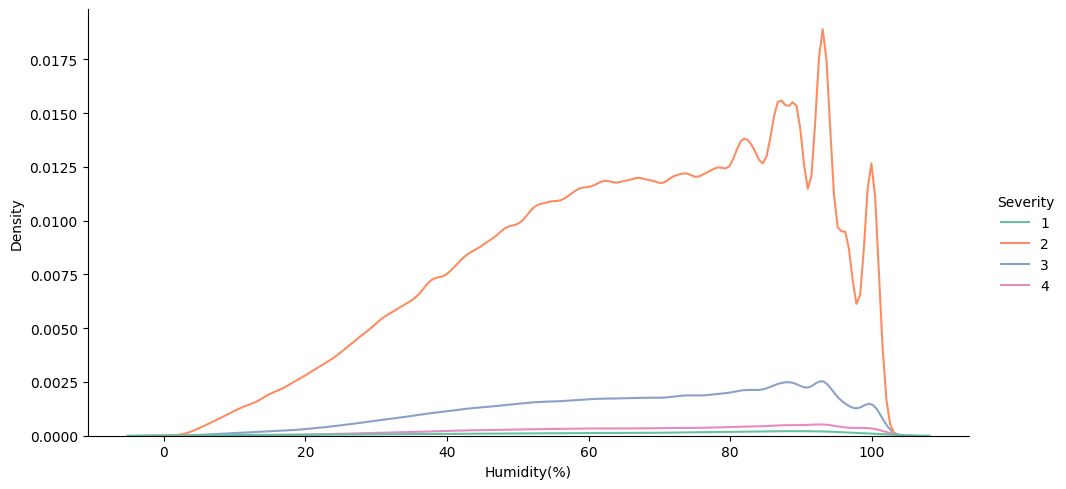

In [26]:
sns.displot(weather, x="Humidity(%)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);


**Pressure(in)**

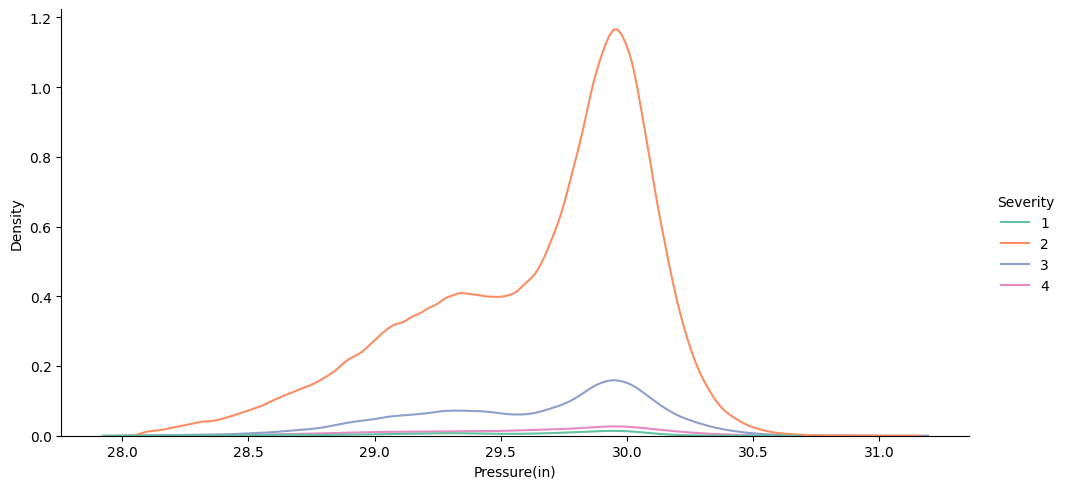

In [27]:
sns.displot(weather, x="Pressure(in)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

**Visibility(mi)**

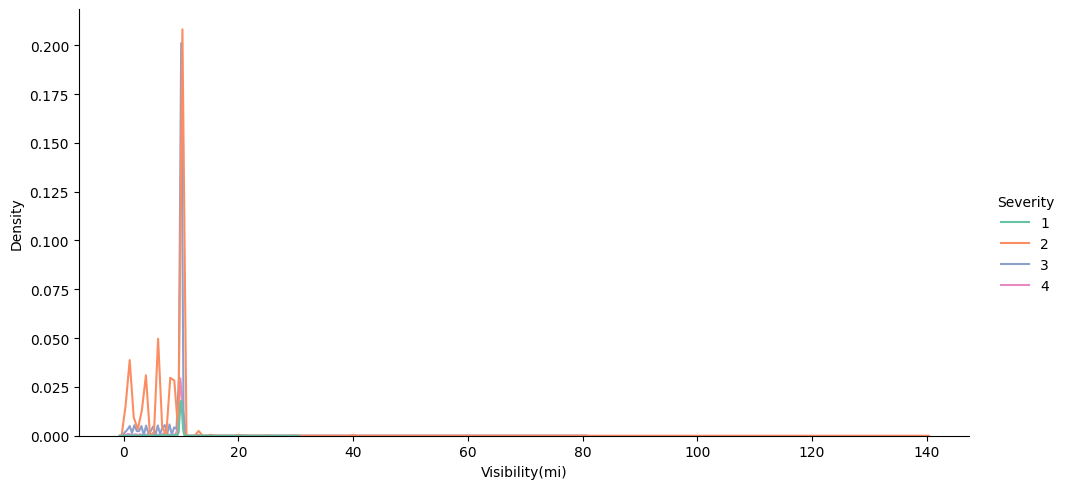

In [28]:
sns.displot(weather, x="Visibility(mi)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

**Wind Direction**

<Axes: xlabel='Wind_Direction', ylabel='count'>

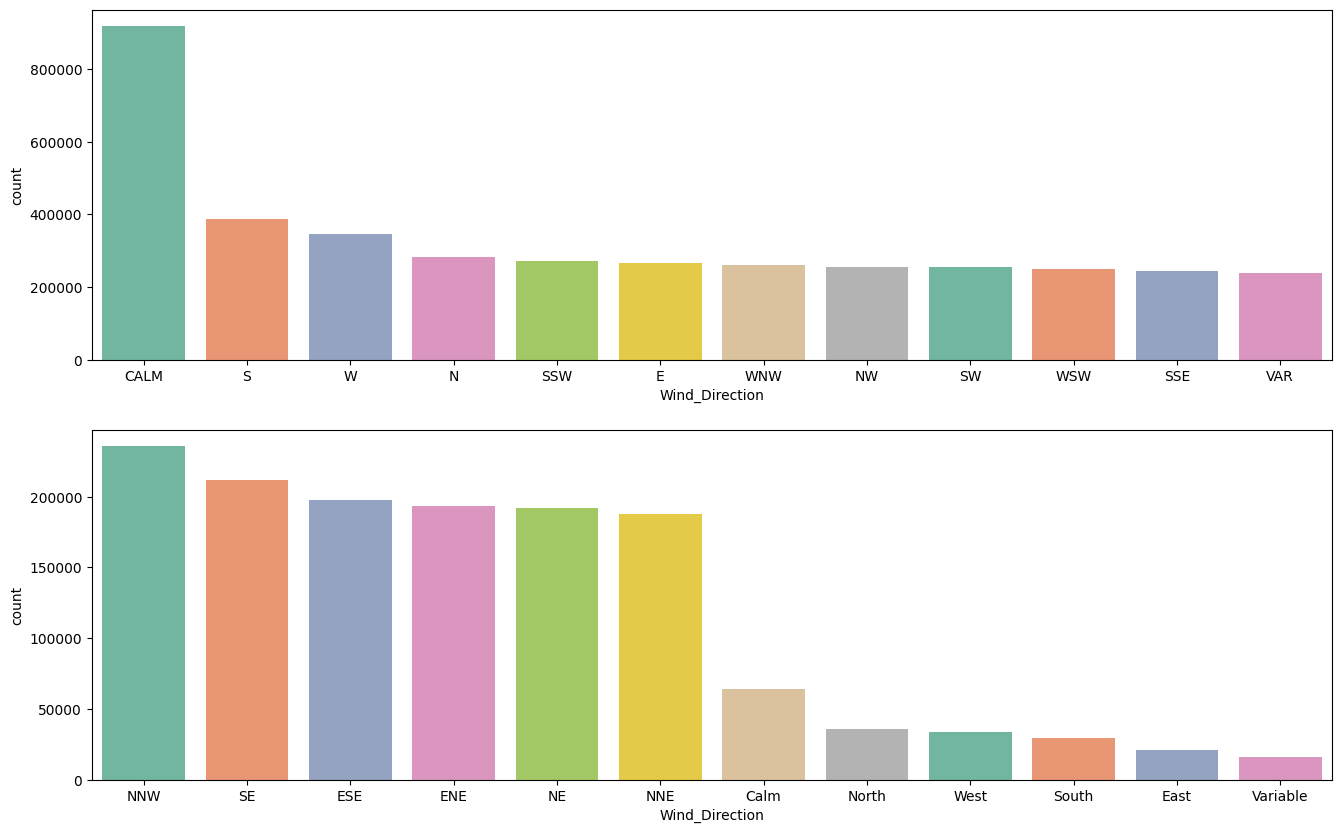

In [29]:
f,ax=plt.subplots(2,figsize=(16,10))
sns.countplot(x="Wind_Direction",
              data=weather,
              order=weather.Wind_Direction.value_counts().iloc[0:12].index,
              palette="Set2",
              ax=ax[0])
sns.countplot(x="Wind_Direction",
              data=weather,
              order=weather.Wind_Direction.value_counts().iloc[12:24].index,
              palette="Set2",
              ax=ax[1])

**Wind Speed(mph)**

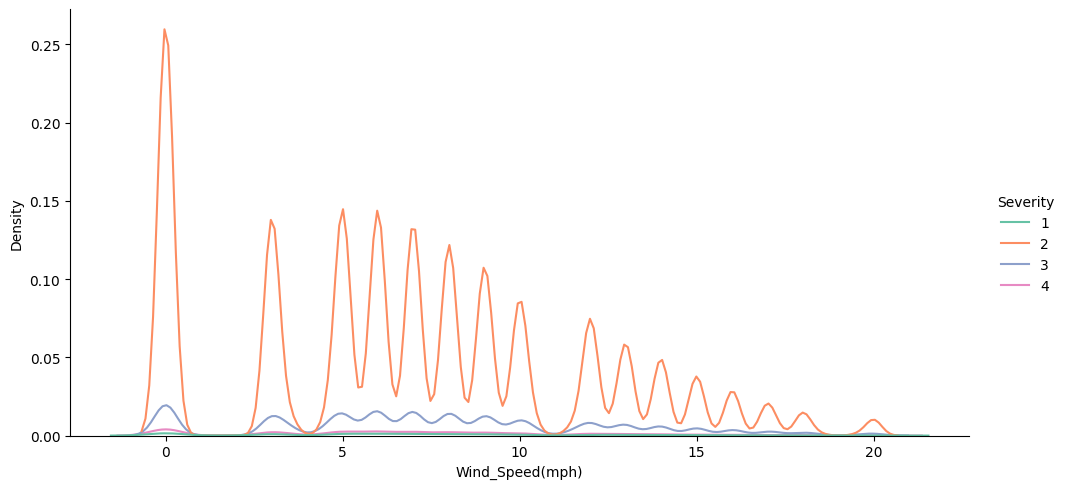

In [30]:
sns.displot(weather, x="Wind_Speed(mph)", hue="Severity",kind='kde', palette="Set2", height=5, aspect=2);

**Weather Condition**

<Axes: xlabel='Weather_Condition', ylabel='count'>

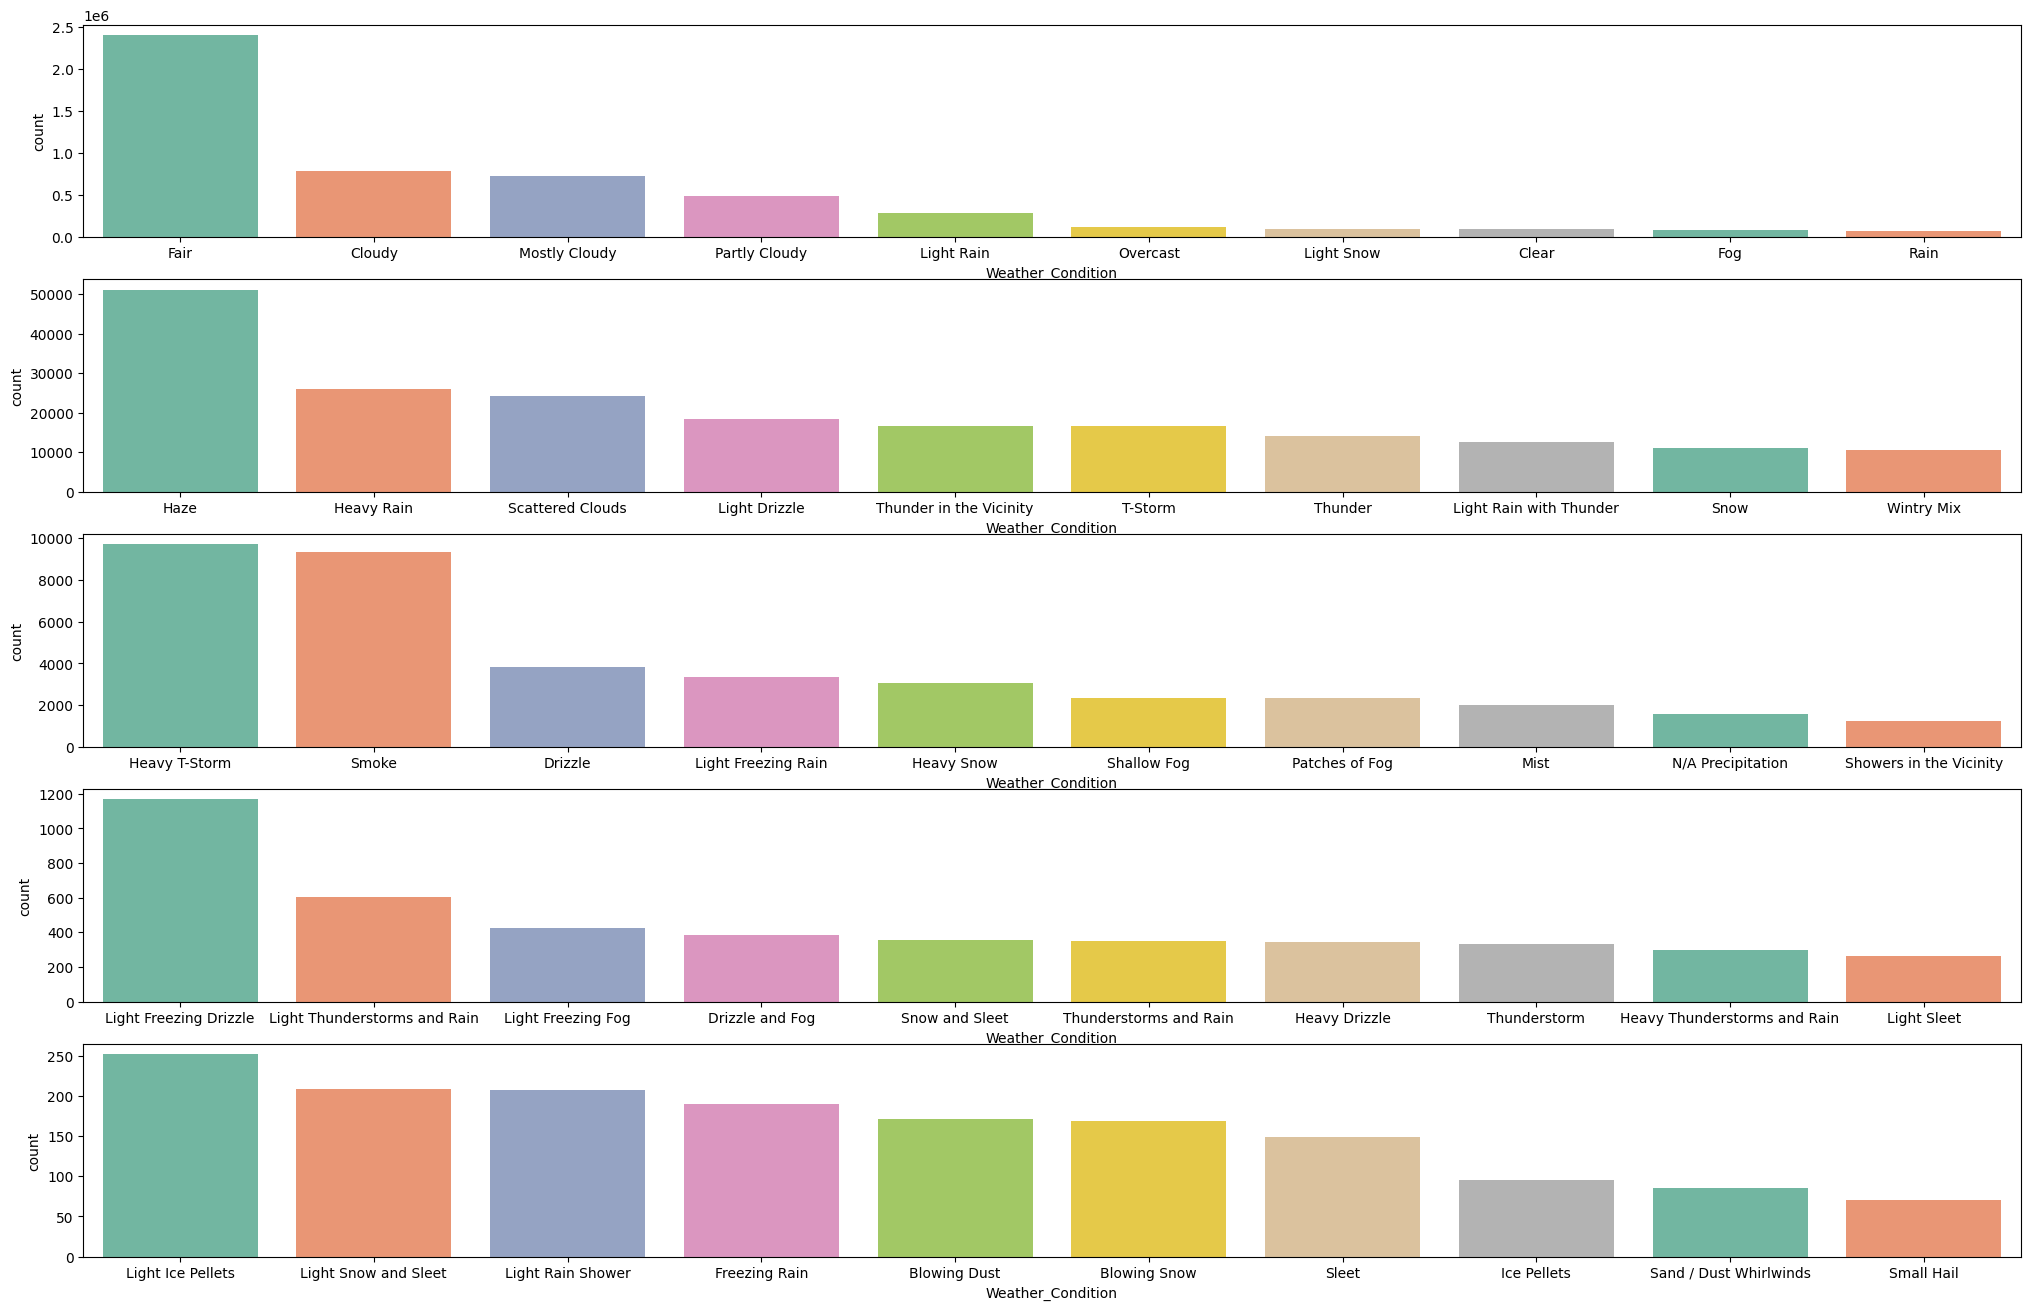

In [31]:
f,ax=plt.subplots(5,figsize=(25,16))
sns.countplot(x="Weather_Condition",
              data=weather,
              order=weather.Weather_Condition.value_counts().iloc[0:10].index,
              palette="Set2",
              ax=ax[0])
sns.countplot(x="Weather_Condition",
              data=weather,
              order=weather.Weather_Condition.value_counts().iloc[10:20].index,
              palette="Set2",
              ax=ax[1])
sns.countplot(x="Weather_Condition",
              data=weather,
              order=weather.Weather_Condition.value_counts().iloc[20:30].index,
              palette="Set2",
              ax=ax[2])
sns.countplot(x="Weather_Condition",
              data=weather,
              order=weather.Weather_Condition.value_counts().iloc[30:40].index,
              palette="Set2",
              ax=ax[3])
sns.countplot(x="Weather_Condition",
              data=weather,
              order=weather.Weather_Condition.value_counts().iloc[40:50].index,
              palette="Set2",
              ax=ax[4])

# Timestamp Analysis

In [32]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Perform operations on the copied DataFrame
df_copy['Start_Time'] = pd.to_datetime(df_copy['Start_Time'], errors='coerce')
df_copy['End_Time'] = pd.to_datetime(df_copy['End_Time'], errors='coerce')

df_copy['Year'] = df_copy['Start_Time'].dt.year
df_copy['Hour'] = df_copy['Start_Time'].dt.hour
df_copy['Month'] = df_copy['Start_Time'].dt.month
df_copy['Day'] = df_copy['Start_Time'].dt.day_name()

**Weekly Analysis of Accidents**

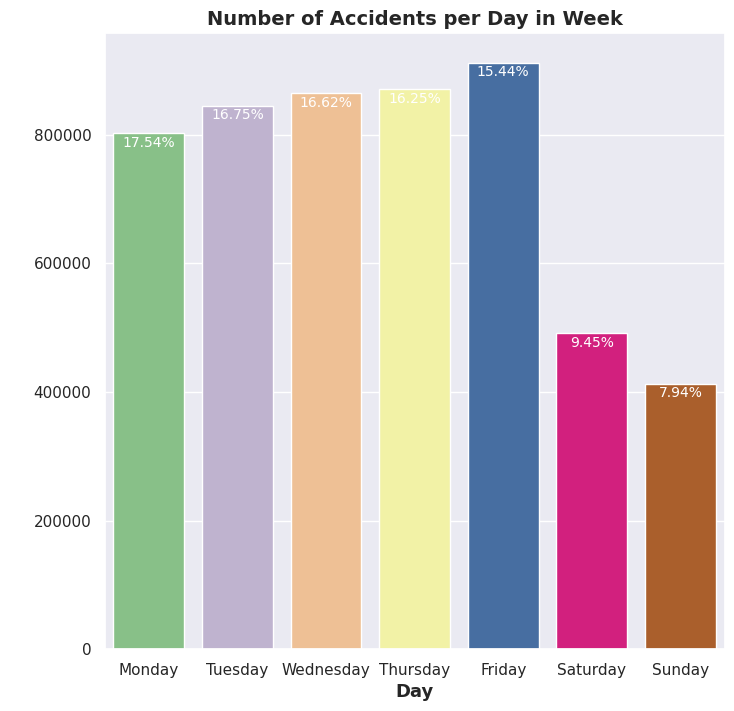

In [33]:
# Set the seaborn style and custom color palette
sns.set(style='darkgrid')
custom_palette = sns.color_palette("Accent", 7)

# Plot the count of accidents per day
plt.figure(figsize=(8, 8))
sns.countplot(x=df_copy["Day"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=custom_palette)

# Calculate and display the percentage on each bar
total_counts = df_copy["Day"].value_counts()
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    proportion = (total_counts.iloc[i] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 15000,
        f'{proportion:.2f}%',
        fontsize=10,
        ha='center',
        va='center',
        color='white'
    )

# Set labels and title
plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents per Day in Week", fontsize=14, fontweight="bold")

plt.show()

In [34]:
df_copy["Is_Weekend"] = df_copy["Day"].isin(["Saturday", "Sunday"])
sns.reset_defaults()

**Monthly Analysis of Accidents**

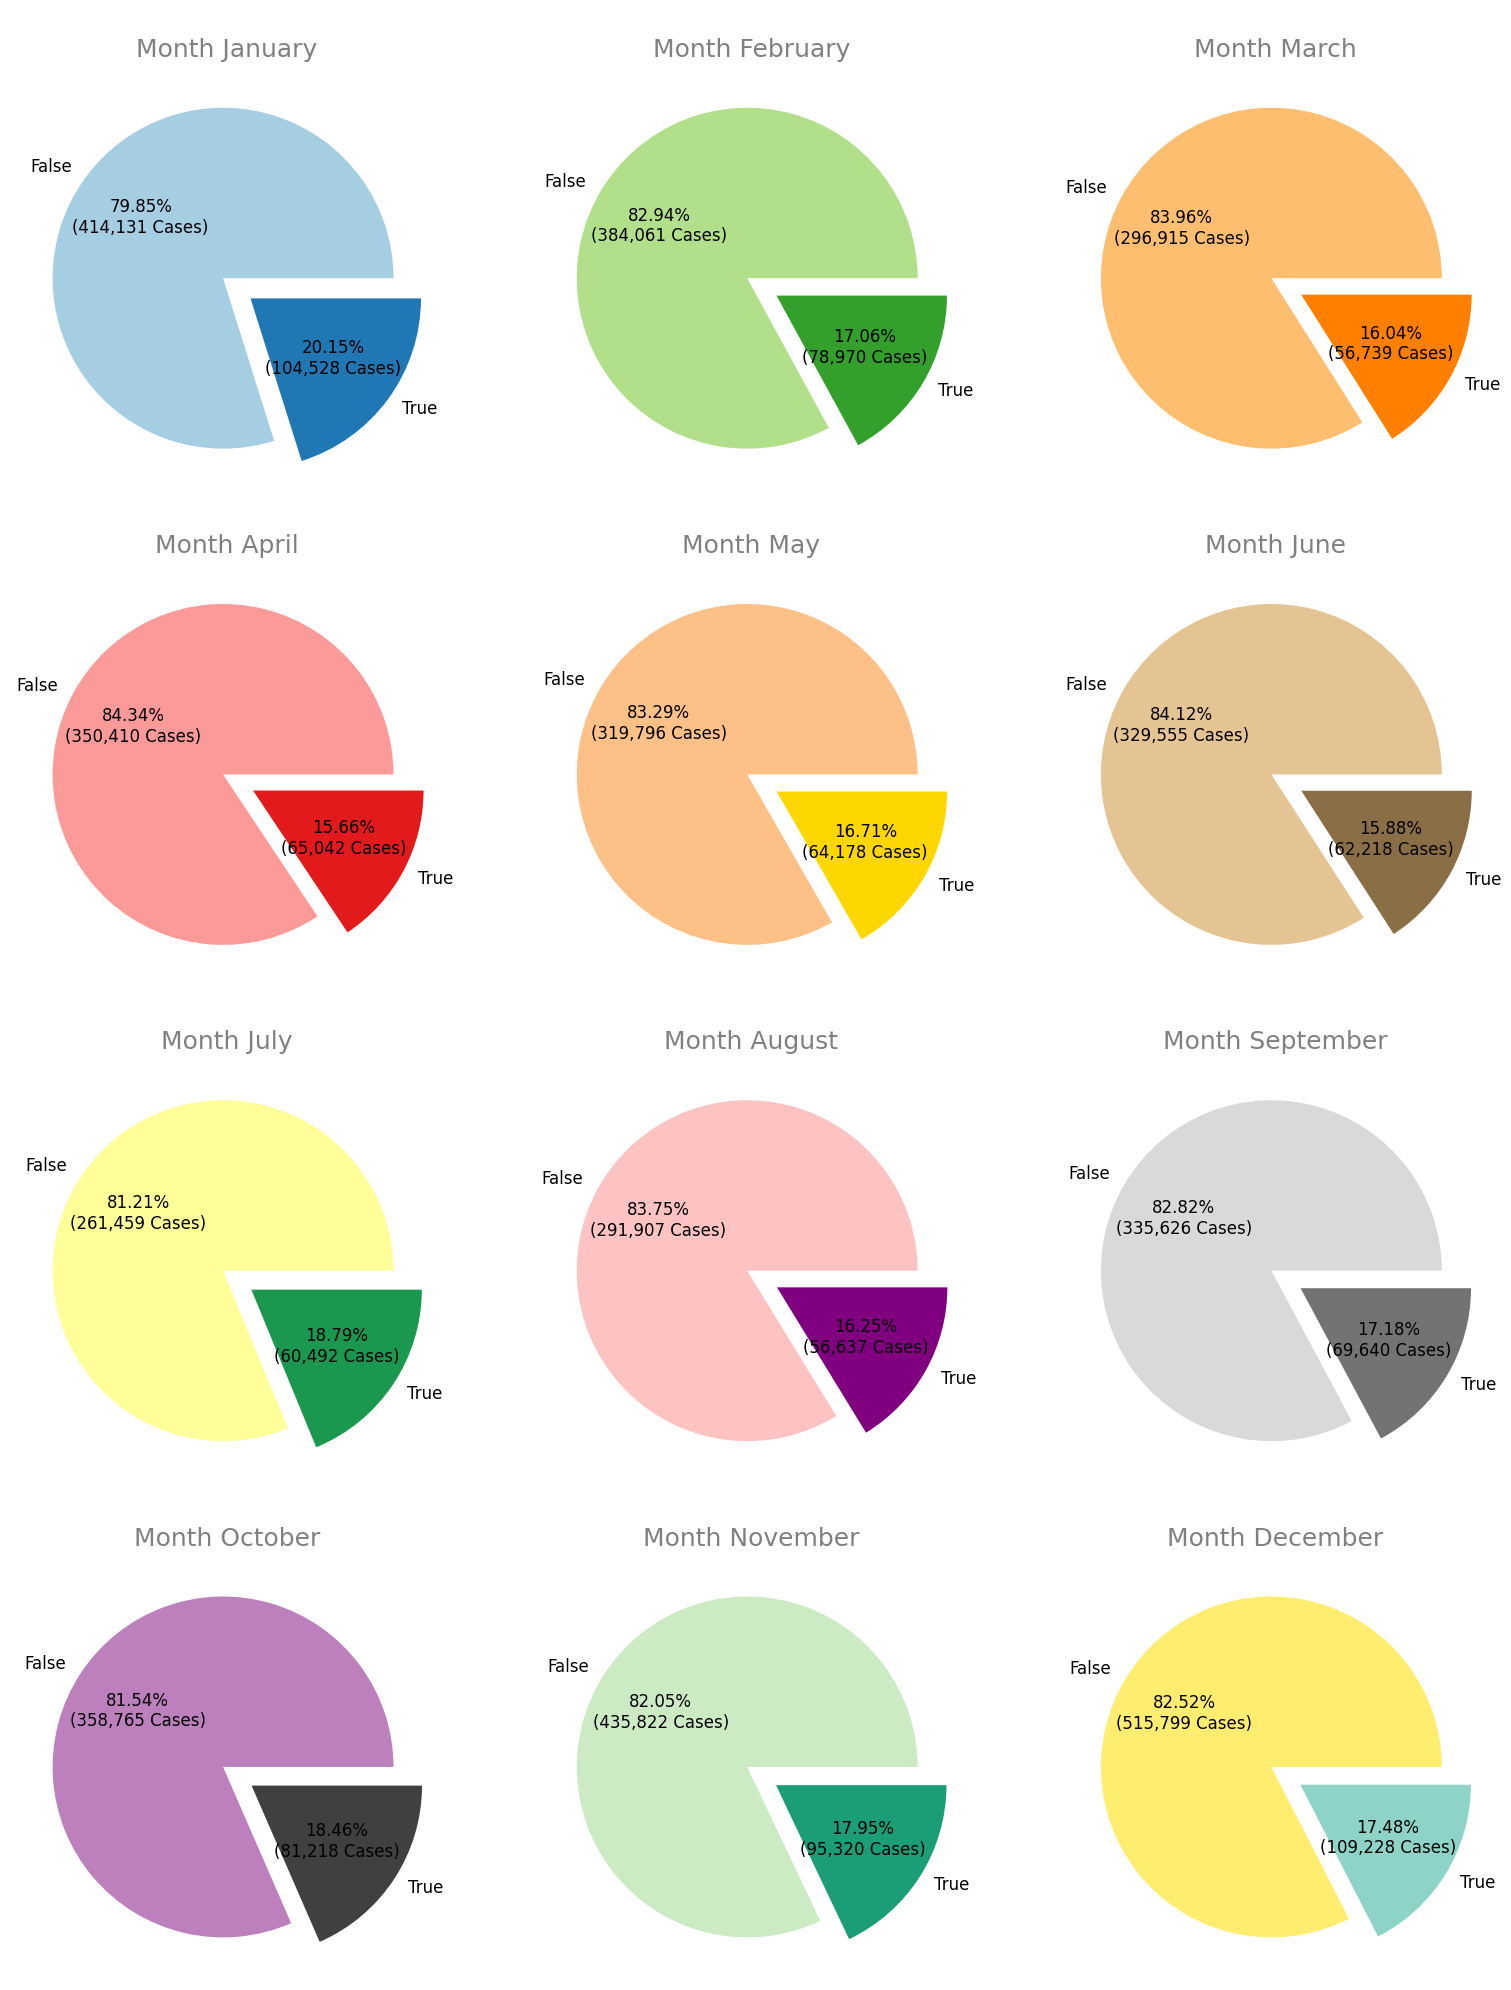

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

colors = [('#A6CEE3', '#1F78B4'), ('#B2DF8A', '#33A02C'), ('#FDBF6F', '#FF7F00'), ('#FB9A99', '#E31A1C'),
          ('#FDC086', '#FFD700'), ('#E5C494', '#8A6E45'), ('#FFFF99', '#1A9850'), ('#FDC3C3', '#800080'),
          ('#D9D9D9', '#737373'), ('#BC80BD', '#404040'), ('#CCEBC5', '#1B9E77'), ('#FFED6F', '#8DD3C7')]

count = 0

def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i, ax in enumerate(axes.flatten()):
    month = i + 1
    size = list(df_copy[df_copy["Month"] == month]["Is_Weekend"].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']
    ax.pie(size, labels=labels, colors=colors[count],
           autopct=lambda pct: func(pct, size), labeldistance=1.1,
           textprops={'fontsize': 12}, explode=[0, 0.2])
    title = '\n Month {}'.format(month_map[month])
    ax.set_title(title, fontsize=18, color='grey')
    count += 1
    
plt.tight_layout()
plt.show()

**Yearly Analysis of Accidents**

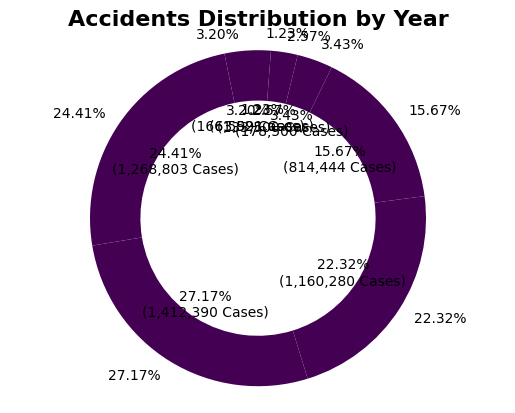

In [36]:
# Assuming df_copy is your DataFrame
year_df = pd.DataFrame(df_copy['Year'].value_counts()).reset_index().sort_values(by='Year', ascending=True)
year = year_df.rename(columns={'Year':'year','count':'cases'})

total_accidents = year['cases'].sum()

fig, ax = plt.subplots()

colors = plt.cm.viridis_r(year['year'] / max(year['year']))

# Create the pie chart
wedges, texts, autotexts = ax.pie(year['cases'], labels=year['year'], autopct=lambda pct: '{:.2f}%'.format(pct),
                                  startangle=90, counterclock=False, colors=colors, wedgeprops=dict(width=0.3))

ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Now you can use total_accidents in your text annotation
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    percentage = year['cases'].iloc[i] / total_accidents * 100
    text.set_text('{:.2f}%'.format(percentage))
    autotext.set_text('{:.2f}%\n({:,d} Cases)'.format(percentage, int(year['cases'].iloc[i])))

plt.title('Accidents Distribution by Year', fontsize=16, fontweight='bold')
plt.show()

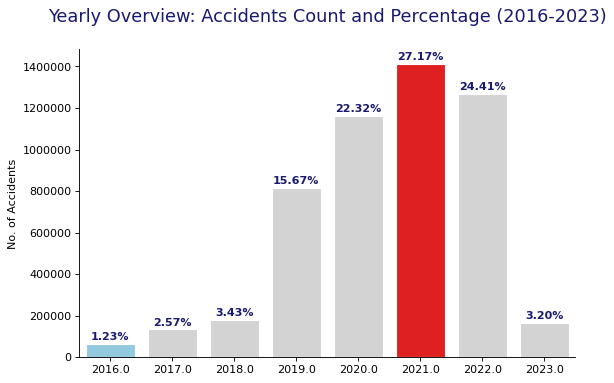

In [37]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 80)
sns.set_style('ticks') # style must be one of white, dark, whitegrid, darkgrid, ticks 

# Determine the colors (as before)
colors = ['red' if val == max(year['cases']) else 'skyblue' if val == min(year['cases']) else 'lightgrey' for val in year['cases']]

sns.barplot(x=year.year, y=year.cases, palette=colors)
ax.spines[('top')].set_visible(False)
ax.spines[('right')].set_visible(False)
ax.set_xlabel(None)
ax.set_ylabel("No. of Accidents")
ax.set_title('Yearly Overview: Accidents Count and Percentage (2016-2023)\n', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

# Customize Y-axis tick labels to show real numbers
def format_func(value, _):
    return f'{value:.0f}'  # Format as whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for p in ax.patches :
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 10, weight='bold', color='MidnightBlue')

for i in ['top','right']:
    side = ax.spines[i]
    side.set_visible(False)

plt.show()

In [38]:
stop = stopwords.words("english") + ["-"]
description_s4 = df_copy[df_copy["Severity"] == 4]["Description"] # filter the data
# Split the description
df_words = description_s4.str.lower().str.split(expand=True).stack()
counts = df_words[~df_words.isin(stop)].value_counts()[:10]

# Severity-Based Analysis of Accidents

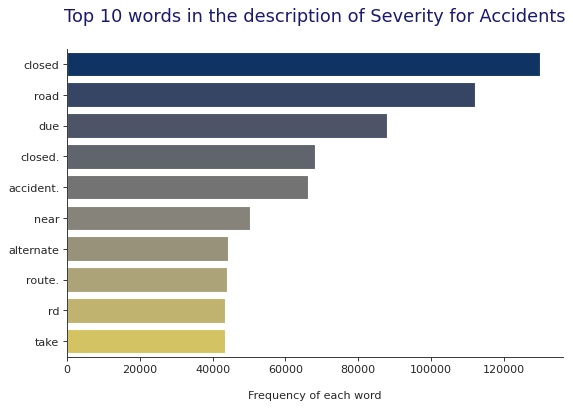

In [39]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=80)
sns.set_style('ticks')
sns.barplot(x=counts.values, y=counts.index, orient="h", palette = "cividis")

ax.set_title("Top 10 words in the description of Severity for Accidents\n", fontsize=16, color='MidnightBlue')
ax.set_xlabel("\nFrequency of each word\n")
ax.set_ylabel(None)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.show()

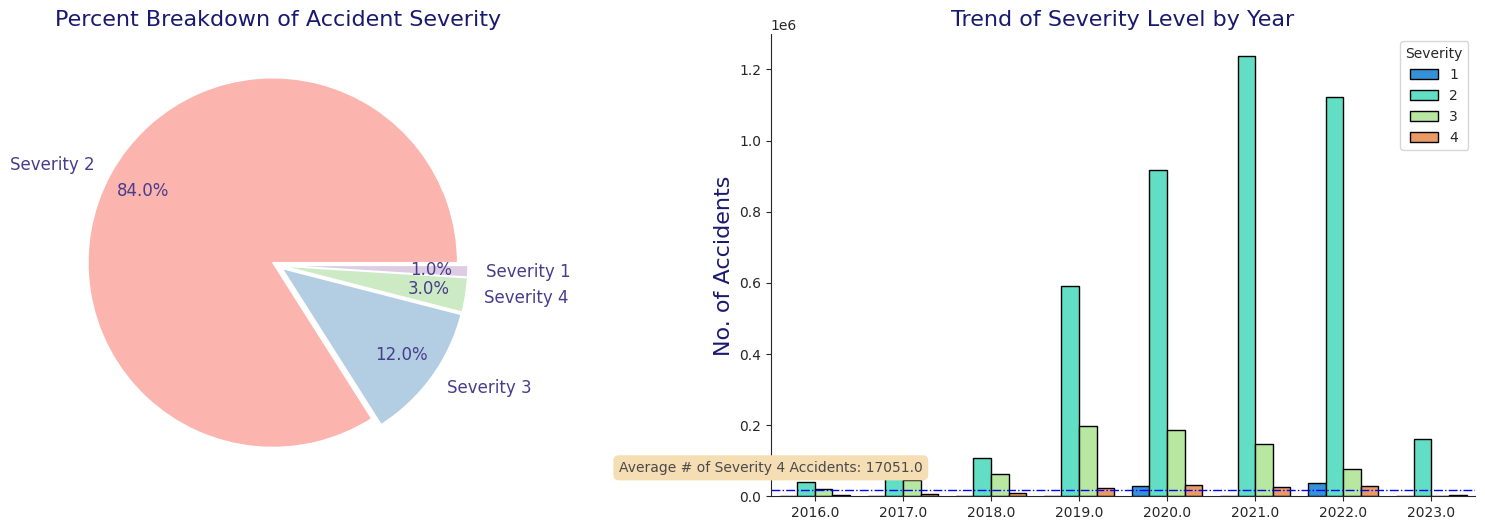

In [40]:
s4_by_yr = df_copy[df_copy['Severity'] == 4][['Severity','Year']].groupby('Year').agg({'Severity': 'count'}).mean().round(0)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))

# Calculate the percentage of each severity level
severity = df_copy['Severity'].value_counts(normalize=True).round(2) * 100
severity.plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='Pastel1'),
                                        pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                        textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                        labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1'])

ax1.set_title("Percent Breakdown of Accident Severity", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )
ax1.set_ylabel(None)


s = sns.countplot(data= df_copy[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'rainbow', edgecolor='black')

ax2.axhline(s4_by_yr[0], color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Average # of Severity 4 Accidents: {s4_by_yr[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0), xy=(-0.5,80000))

ax2.set_title("Trend of Severity Level by Year", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )
ax2.set_ylabel("\nNo. of Accidents", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )
ax2.set_xlabel(None)

for i in ['top', 'right']:
    side = ax2.spines[i]
    side.set_visible(False)

# sns.despine(left=True)
plt.show()

# Observations

* California is the state with highest number of accidents, followed by Florida and Texas
* Miami records highest number of accidents followed by Houston, Los Angeles and Charlotte
* We can observe most of the accidents occurred on working days
* Most of the accidents happened on a clear day
* Too many accidents were of Severity level 2, we might need to balance the whole data to make hybrid models
